In [1]:
import torch

In [2]:
T = torch.rand(10,2)

In [5]:
torch.ones(10,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [7]:
torch.empty(10,2)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

In [14]:
torch.rand(10,2)

tensor([[0.2762, 0.9280],
        [0.0031, 0.3345],
        [0.2314, 0.7607],
        [0.0572, 0.7790],
        [0.6485, 0.9816],
        [0.4311, 0.6760],
        [0.5851, 0.7050],
        [0.2527, 0.3820],
        [0.9613, 0.8164],
        [0.2420, 0.3751]])

In [18]:
x = torch.randn(4,4)

In [19]:
x = x.view(16)

In [21]:
x

tensor([-0.0338,  0.4488,  0.6990,  0.8510,  1.6825,  1.3088,  1.1603,  0.6578,
         0.2328,  0.0494, -0.3109, -1.6450,  0.2807, -0.1644, -0.3308, -1.0315])

In [23]:
class student:
    def __init__(self, name, age):
        self.name = name
        self.age = age


john = student("John", 21)

print(john.name)
print(john.age)

John
21


In [27]:
type(john)

__main__.student

In [28]:
import torch
import torch.nn as nn

In [36]:
n_input = 7 # 7 inputs which is featues
n_hidden = 5 # 5 hidden nodes and check for 6 -- if we have more hidden nodes then it might endup over fitting
n_out = 1 # 1 output and they all are fully connected
batch_size = 100 # 100 samples - data size
learning_rate = 0.01 # new rate = old rate * learning rate - old rate

data_x = torch.randn(batch_size, n_input)
data_y = torch.rand(batch_size,1)

print(data_x.size())
print(data_y.size())

#setting a model - this is called making an architecture 
#-- Relu Activation function for those 5 vectors
#-- nn.sigmoid another activation function to keep data between 0 and 1
model = nn.Sequential(nn.Linear(n_input, n_hidden), nn.ReLU(), nn.Linear(n_hidden, n_out), nn.Sigmoid())
print(model)

#loss function
loss_function = nn.MSELoss()

#define optimizer -- Stochastic Gradient Descent for optimisation
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

torch.Size([100, 7])
torch.Size([100, 1])
Sequential(
  (0): Linear(in_features=7, out_features=6, bias=True)
  (1): ReLU()
  (2): Linear(in_features=6, out_features=1, bias=True)
  (3): Sigmoid()
)


In [37]:
losses = []
for epoch in range(50000):
    #forward pass
    pred_y = model(data_x)
    #calculate loss
    loss = loss_function(pred_y, data_y)
    #append to list of losses
    losses.append(loss.item())
    model.zero_grad()
    loss.backward()
    optimizer.step()
    

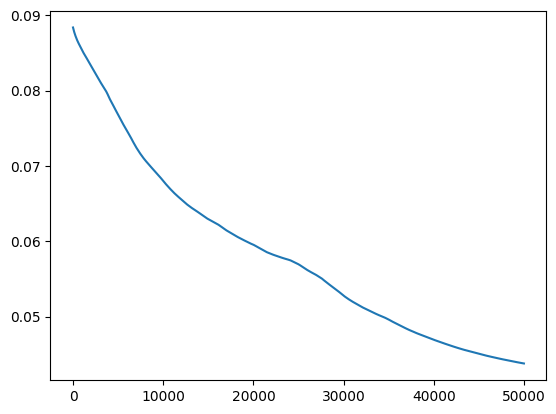

In [38]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [39]:
import pandas as pd

In [46]:
#download data from below lin:
#https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction/code

data = pd.read_csv(r"C:\Users\kanna\Downloads\medical_insurance.csv")

In [47]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [57]:
data_sex = pd.get_dummies(data['sex'], dtype=float)
data_smoker = pd.get_dummies(data['smoker'], dtype=float)
data_region = pd.get_dummies(data['region'], dtype=float)

In [67]:
data_new = pd.concat([data_sex, data_smoker, data_region, data], axis=1)

In [68]:
data_new_f = data_new.drop(['sex','smoker','region'], axis=1)

In [69]:
data_new_f

,female,male,no,yes,northeast,northwest,southeast,southwest,age,bmi,children,charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19,27.900,0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18,33.770,1,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28,33.000,3,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33,22.705,0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32,28.880,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,47,45.320,1,8569.86180
2768,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21,34.600,0,2020.17700
2769,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,19,26.030,1,16450.89470
2770,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,23,18.715,0,21595.38229


In [72]:
data_new_f

,female,male,no,yes,northeast,northwest,southeast,southwest,age,bmi,children,charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19,27.900,0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18,33.770,1,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28,33.000,3,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33,22.705,0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32,28.880,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,47,45.320,1,8569.86180
2768,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21,34.600,0,2020.17700
2769,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,19,26.030,1,16450.89470
2770,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,23,18.715,0,21595.38229


In [70]:
#get column headers
col_headers = list(data_new_f.columns.values)

#convert to torch tensors
torch_tensor_csv = torch.tensor(data_new_f[col_headers].values).float()

In [71]:
torch_tensor_csv

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.7900e+01, 0.0000e+00,
         1.6885e+04],
        [0.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.3770e+01, 1.0000e+00,
         1.7256e+03],
        [0.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.3000e+01, 3.0000e+00,
         4.4495e+03],
        ...,
        [0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 2.6030e+01, 1.0000e+00,
         1.6451e+04],
        [0.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.8715e+01, 0.0000e+00,
         2.1595e+04],
        [0.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.1600e+01, 0.0000e+00,
         9.8504e+03]])

In [86]:
data_x = torch_tensor_csv[:,1:11].clone()
data_y = torch_tensor_csv[:,11:12].clone()

In [88]:
#normalize - scaling data
#data_x = torch.div(data_x,1)

data_y = torch.div(data_y,100000)

In [94]:
print(data_x.size())
print(data_y.size())

torch.Size([2772, 10])
torch.Size([2772, 1])


In [104]:
n_input = 10 # 7 inputs which is featues
n_hidden_1 = 6 # 5 hidden nodes and check for 6 -- if we have more hidden nodes then it might endup over fitting
n_hidden_2 = 4
n_out = 1 # 1 output and they all are fully connected
batch_size = 2772 # 100 samples - data size
learning_rate = 0.01 # new rate = old rate * learning rate - old rate

#we formatted the data_x and data_y in previous cells

print(data_x.size())
print(data_y.size())

#setting a model - this is called making an architecture 
#-- Relu Activation function for those 5 vectors
#-- nn.sigmoid another activation function to keep data between 0 and 1
model = nn.Sequential(nn.Linear(n_input, n_hidden_1), nn.Sigmoid(), nn.Linear(n_hidden_1, n_hidden_2),  nn.ReLU(), nn.Linear(n_hidden_2, n_out), nn.Sigmoid())
print(model)

#loss function
loss_function = nn.MSELoss()

#define optimizer -- Stochastic Gradient Descent for optimisation
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

torch.Size([2772, 10])
torch.Size([2772, 1])
Sequential(
  (0): Linear(in_features=10, out_features=6, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=6, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)


In [105]:
losses = []
for epoch in range(10000):
    #forward pass
    pred_y = model(data_x)
    #calculate loss
    loss = loss_function(pred_y, data_y)
    #append to list of losses
    losses.append(loss.item())
    model.zero_grad()
    loss.backward()
    optimizer.step()
    

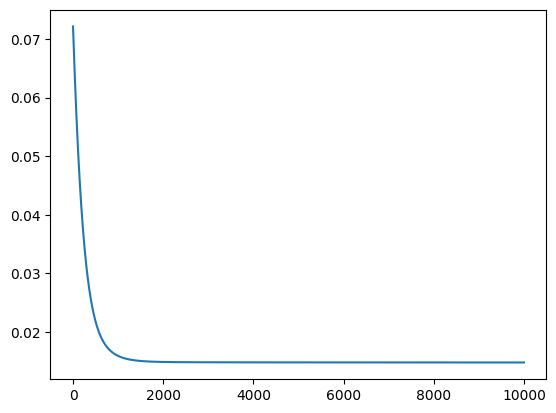

In [106]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [107]:
y_pred = model(data_x)

In [111]:
y_op = torch.mul(y_pred,10000)

In [112]:
y_op

tensor([[1330.2169],
        [1342.3949],
        [1326.1381],
        ...,
        [1332.3466],
        [1328.5287],
        [1324.2224]], grad_fn=<MulBackward0>)